[ADD6379.jpg] GT: ADD6379 | Pred: ADD6379 | ✅
[AFR9854.jpg] GT: AFR9854 | Pred: AFR9854 | ✅
[AGC6705.jpg] GT: AGC6705 | Pred: AGC6705 | ✅
[AJE631.jpg] GT: AJE631 | Pred: AJE631 | ✅
[AJU4818.JPG] GT: AJU4818 | Pred: AJU4818 | ✅
[AKD9878.jpg] GT: AKD9878 | Pred: AKD9878 | ✅
[AKL8520.jpg] GT: AKL8520 | Pred: AKL8520 | ✅
[AKQ206.jpg] GT: AKQ206 | Pred: AKQ206 | ✅
[AKT5.png] GT: AKT5 | Pred: AKT5 | ✅
[AMC9600.png] GT: AMC9600 | Pred: AMC9600 | ✅
[AML8686.jpg] GT: AML8686 | Pred: AML0686 | ❌
[AMP4147.jpg] GT: AMP4147 | Pred: AMP4147 | ✅
[AMX9173.jpg] GT: AMX9173 | Pred: AMX973 | ❌
[BEF3368.jpg] GT: BEF3368 | Pred: BEF3368 | ✅
[BGD8255.jpg] GT: BGD8255 | Pred: BGD8255 | ✅
[BHD6344.png] GT: BHD6344 | Pred: BHD6344 | ✅
[BJA5494.jpg] GT: BJA5494 | Pred: BJA5494 | ✅
[BKJ5013.jpg] GT: BKJ5013 | Pred: BKJ5013 | ✅
[BLL2943.jpg] GT: BLL2943 | Pred: BLL2943 | ✅
[BLP1728.jpg] GT: BLP1728 | Pred: BLP1728 | ✅
[BLQ3936.jpg] GT: BLQ3936 | Pred: 1LO3336 | ❌
[BMJ8875.jpg] GT: BMJ8875 | Pred: BMU8875 | ❌
[BMX

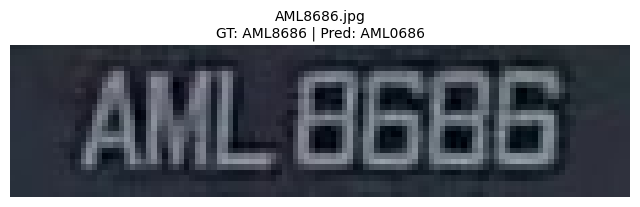

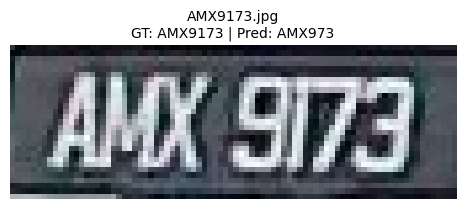

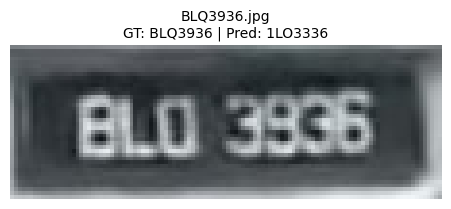

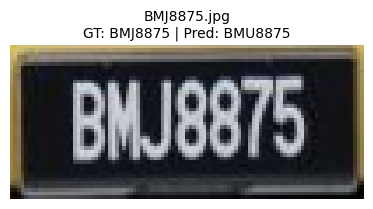

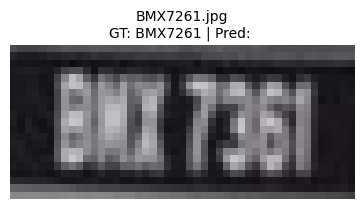

In [1]:
import os
import cv2
import easyocr
import pandas as pd
import matplotlib.pyplot as plt

# 📁 Dataset path
dataset_path = r"C:\Users\NITRO 5\OneDrive - Swinburne Sarawak\General - COS30018 INTELLIGENT SYSTEMS\Dataset\OCR\Combined"
subfolders = ['train', 'test']

# 🧠 Initialize EasyOCR reader
reader = easyocr.Reader(['en'], gpu=True)

# 📊 Result container
results = []
failed_samples = []

# 🔍 Simple OCR function using EasyOCR default flow
def easyocr_predict(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return "", None

    result = reader.readtext(image, detail=0)
    predicted_text = ''.join(result).strip().replace(" ", "").upper()
    return predicted_text, image

# 🔁 Loop through both train and test sets
for sub in subfolders:
    folder = os.path.join(dataset_path, sub)
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder, filename)
            ground_truth = os.path.splitext(filename)[0].upper().replace(" ", "")
            predicted_text, image = easyocr_predict(image_path)

            correct = (predicted_text == ground_truth)
            results.append({
                "file": filename,
                "folder": sub,
                "ground_truth": ground_truth,
                "predicted": predicted_text,
                "match": correct
            })

            if not correct:
                failed_samples.append((filename, ground_truth, predicted_text, image))

            print(f"[{filename}] GT: {ground_truth} | Pred: {predicted_text} | ✅" if correct else f"[{filename}] GT: {ground_truth} | Pred: {predicted_text} | ❌")

# 📊 Accuracy summary
total = len(results)
correct = sum(r["match"] for r in results)
accuracy = correct / total * 100
print(f"\n🔍 Total Samples: {total} | Correct: {correct} | Accuracy: {accuracy:.2f}%")

# 💾 Save to Excel
results_df = pd.DataFrame(results)
output_file = os.path.join(dataset_path, "easyocr_results_normal.xlsx")
results_df.to_excel(output_file, index=False)
print(f"📁 Results saved to: {output_file}")

# 🖼️ Show failed samples
print(f"\n🔍 Showing {min(5, len(failed_samples))} failed predictions:")

for idx, (filename, gt, pred, img) in enumerate(failed_samples[:5]):  # limit to first 5
    plt.figure(figsize=(8, 2))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"{filename}\nGT: {gt} | Pred: {pred}", fontsize=10)
    plt.axis('off')
    plt.show()
